In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

In [15]:
for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

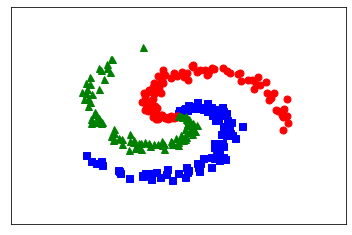

In [16]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [18]:
X.shape

(2, 300)

In [19]:
model = Sequential([
    Dense(15, activation='relu',input_shape=(2,)),
    Dense(15, activation='relu'),
    Dense(15, activation='relu'),
    Dense(3,activation='softmax')
])

In [20]:
model = Sequential()
model.add(Dense(50, activation='relu',input_shape=(2,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3,activation='softmax'))

In [21]:
model.compile(
        optimizer='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
)


In [22]:
X = X.reshape((-1,2))
X.shape



(300, 2)

In [29]:
MH = model.fit(
    X,
    to_categorical(y),
    epochs=100,
    batch_size=32,    
)
print("xong!")

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7213 - accuracy: 0.6933
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7182 - accuracy: 0.6867
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.6767
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7174 - accuracy: 0.6833
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7173 - accuracy: 0.6733
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7112 - accuracy: 0.6867
Epoch 7/100
10/10 [==============================] - 0s 889us/step - loss: 0.7127 - accuracy: 0.7033
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.6967
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7201 - accuracy: 0.6767
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7091 - accuracy: 0.6967
Epoch 1

In [30]:
model.evaluate(X,to_categorical(y))

10/10 [==============================] - 0s 779us/step - loss: 0.6464 - accuracy: 0.7133


[0.6463866233825684, 0.7133333086967468]

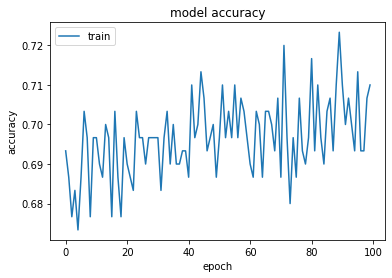

In [32]:
import keras
import matplotlib.pyplot as plt
plt.plot(MH.history['accuracy'])
#=plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()